
A la Ecuacion de segundo orden le realizaremos una reduccion de orden:

$$ F(t,u) = \begin{bmatrix}y'(t,u) \\y''(t,u)\end{bmatrix}\ = \begin{bmatrix}v(t,u) \\v'(t,u)\end{bmatrix}\ $$

con: $$ u_0 = \begin{bmatrix}y_0 \\v_0 \end{bmatrix}\ ; u_n = \begin{bmatrix}y_n \\v_n \end{bmatrix}\ $$

aplicando el método de Ronge-Kutta de orden 2, resolvemos:

$$ q_1= h * F(t_n , u_n) = \begin{bmatrix} h * v(t_n,u_n) \\ h * v'(t_n,u_n) \end{bmatrix}\ = \begin{bmatrix} q_{1y} \\ q_{1v} \end{bmatrix} $$

$$q_2= h * F(t_{n+1} , u_n + q_1) = h* F \begin{pmatrix} t_n , \begin{bmatrix} v_n + q_{1v} \\ y_n + q_{1y} \end{bmatrix}\ \end{pmatrix} = \begin{bmatrix} q_{2y} \\ q_{2v} \end{bmatrix}\ $$

$$ u_{n+1} = u_n + \frac{1}{2} * (q_1 + q_2) = \begin{bmatrix} v_{n+1} \\ y_{n+1} \end{bmatrix} = \begin{bmatrix} v_n \\ y_n \end{bmatrix} +  \frac{1}{2} *
\begin{pmatrix} \begin{bmatrix} q_{1y} + q_{2y} \\ q_{1v} + q_{2v} \end{bmatrix} \end{pmatrix} $$




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#definicion de constantes utilizadas
G = 3.72
M = 1000
ALFA = 250000
BETA = 0.0320
ETA = 0.6000
H0 = 130000
V0 = -5555.56
HAP = 13000
HLIB = 2000
VE = 1000
HGRUA = 20
MC0 = M * (G / VE)

Modelo Físico:

Un objeto en caída libre dentro de un fluido turbulento está sometido principalmente a la fuerza gravitatoria y a una fuerza de rozamiento. Aplicando la Segunda Ley de Newton acorde a la mecánica clásica:

Etapa 1:
$$ 𝑦´´ = −𝑔 + \frac{1}{𝑀} 𝛽 𝑒^{− \frac{𝑦} {𝛼}} 𝑦´^{2} $$

iniciales:

$$𝑦(𝑡 = 0) = 𝐻_0 = 130𝑘𝑚 = 130000𝑚$$

$$𝑦′(𝑡 = 0) = 𝑣_0 = −20000 \frac{𝑘m}{ℎ}= −5555 \frac{𝑚}{𝑠} $$
Etapa 2:
$$ 𝑦´´ = −𝑔 + \frac{1}{𝑀} 𝛽 𝑒^{− \frac{𝑦} {𝛼}} 𝑦´^{2} $$

iniciales:

$$𝑦(𝑡 = 0) = 𝐻_0 = 130𝑘𝑚 = 130000𝑚$$

$$𝑦′(𝑡 = 0) = 𝑣_0 = −20000 \frac{𝑘m}{ℎ}= −5555 \frac{𝑚}{𝑠} $$

Etapa 2:

$$𝑦´´ = −𝑔 + \frac{𝜂}{m} 𝑦´^2$$
Donde η es un coeficiente que dependerá de la geometría del paracaídas.
Las condiciones iniciales son las finales de la etapa anterior.

Etapa 3:
$$𝑦′′ = −𝑔 + \frac{1}{𝑀}[𝑚̇𝑐_0 − 𝑘_1(𝑦 − 𝐻_{𝑔𝑟𝑢𝑎}) − 𝑘_2 𝑦′](𝑣_𝑒 − 𝑦′) $$

𝑚̇𝑐_0 es el caudal masico inicial


In [ ]:
#definicicion de la ecuacion utilizada en la etapa 1
def funcion1(y,v):
  fy = v
  fv = -G + (1/M * BETA * np.exp(-y/ALFA) * v**2)
  return [fy,fv]

In [ ]:
#definicicion de la ecuacion utilizada en la etapa 2
def funcion2(y,v):
  # Etapa II F= (fx,fy) = (v,-g + eta/M v^2)
  fx = v
  fy = -G + (ETA/M * v**2)
  fy = round(fy,8)

  return [fx,fy]

In [ ]:
#definicicion de la ecuacion utilizada en la etapa 3
def funcion3(y,v):
  # Etapa II F= (fx,fy) = (v,-g + eta/M v^2)
  mc = MC0 - (k1_ * (y - HGRUA)) + abs(k2_ * v)
  if mc < 0:
    mc = 0
  fx = v
  fy = -G + 1/M * mc * (VE - v)
  fy = round(fy,8)

  return [fx,fy,mc]

In [ ]:
def RK2(altura_inicial, velocidad_inicial, altura_final, h, funcion):
    # Inicio t (primera iteracion en t=0)
    i = 0
    # Vector resultado de iteracion
    res_i = [[altura_inicial, velocidad_inicial]]
    ti = [0]
    k1v = ["--"]
    k2v = ["--"]
    er = ["--"]

    # Iteracion
    while res_i[i][0] > altura_final:
        k1 = funcion(res_i[i][0], res_i[i][1])
        k1 = [h * k1[0],h * k1[1]]
        k1v.append(k1)
        k2 = funcion(res_i[i][0] + k1[0] * h, res_i[i][1] + k1[1] * h)
        k2 = [h * k2[0],h * k2[1]]
        k2v.append(k2)
        res_i.append([
            res_i[i][0] + (k1v[i+1][0] * 0.5 + k2v[i+1][0] * 0.5),
            res_i[i][1] + (k1v[i+1][1] * 0.5 + k2v[i+1][1] *0.5 )
        ])  # agregar expresion final
        er.append([
            abs(res_i[i+1][0] - res_i[i][0]) * 100 / abs(res_i[i][0]),
            abs(res_i[i+1][1] - res_i[i][1]) * 100 / abs(res_i[i][1])
        ])  # error absoluto
        ti.append(ti[i] + h)
        i += 1

    return (ti, res_i, k1v, k2v, er)

In [ ]:
ti_e1, res_i_e1, k1v_e1, k2v_e1, er_e1 = RK2(H0,V0,13000,0.01,funcion1)

In [ ]:
df_e1 = pd.DataFrame({
    'altura (m)': [res[0] for res in res_i_e1],
    'velocidad(m/s)': [res[1] for res in res_i_e1],
    'q1y': [k1[0] for k1 in k1v_e1],
    'q2y': [k2[0] for k2 in k2v_e1],
    'q1v': [k1[1] for k1 in k1v_e1],
    'q2v': [k2[1] for k2 in k2v_e1],
    'error_altura (%)': [e[0] for e in er_e1],
    'error_velocidad (%)': [e[1] for e in er_e1]
}, index=ti_e1)
df_e1.index.name = 'Tiempo(s)'

In [ ]:
df_e1

,altura (m),velocidad(m/s),q1y,q2y,q1v,q2v,error_altura (%),error_velocidad (%)
Tiempo(s),,,,,,,,
0.00,130000.000000,-5555.560000,-,-,-,-,-,-
0.01,129944.444692,-5549.725438,-55.5556,-55.555017,5.834617,5.834507,0.042735,0.105022
0.02,129888.947729,-5543.901900,-55.497254,-55.496672,5.823593,5.823483,0.042708,0.104934
0.03,129833.509000,-5538.089358,-55.439019,-55.438438,5.812598,5.812488,0.042682,0.104846
0.04,129778.128397,-5532.287780,-55.380894,-55.380313,5.801632,5.801523,0.042655,0.104758
...,...,...,...,...,...,...,...,...
92.76,13017.909847,-486.626226,-4.86661,-4.866606,0.034742,0.034742,0.03737,0.007139
92.77,13013.043587,-486.591493,-4.866262,-4.866259,0.034733,0.034733,0.037381,0.007137
92.78,13008.177674,-486.556769,-4.865915,-4.865911,0.034724,0.034724,0.037393,0.007136


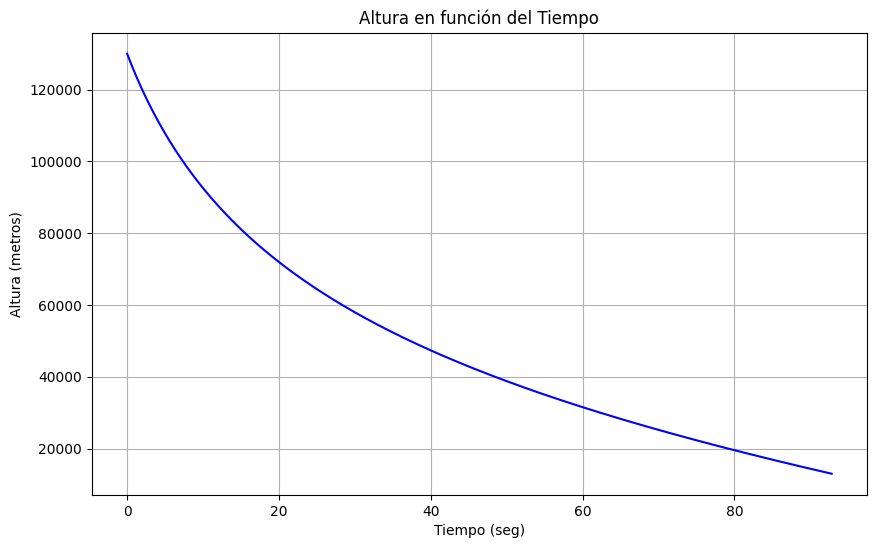

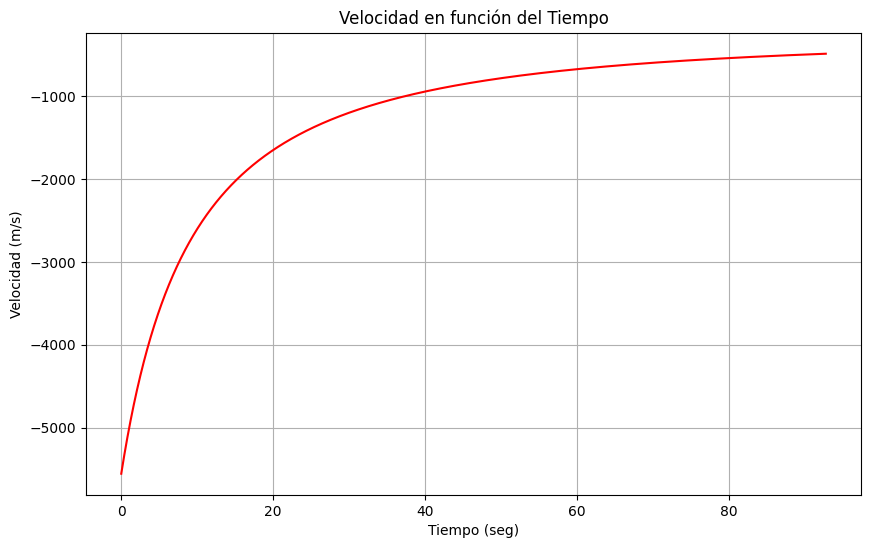

In [ ]:
#creaccion de graficos
#altura vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e1.index, df_e1['altura (m)'],'-b')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Altura (metros)')
plt.title('Altura en función del Tiempo')
plt.grid(True)
plt.show()
#valocidad vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e1.index, df_e1['velocidad(m/s)'],'-r')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad en función del Tiempo')
plt.grid(True)
plt.show()

In [ ]:
altura_inicial_e2, v_inicial_e2 = res_i_e1[-1]

In [ ]:
ti_e2, res_i_e2, k1v_e2, k2v_e2, er_e2 = RK2(altura_inicial_e2,v_inicial_e2,2000,0.01,funcion2)

In [ ]:
df_e2 = pd.DataFrame({
    'altura (m)': [res[0] for res in res_i_e2],
    'velocidad(m/s)': [res[1] for res in res_i_e2],
    'q1y': [k1[0] for k1 in k1v_e2],
    'q2y': [k2[0] for k2 in k2v_e2],
    'q1v': [k1[1] for k1 in k1v_e2],
    'q2v': [k2[1] for k2 in k2v_e2],
    'error_altura (%)': [e[0] for e in er_e2],
    'error_velocidad (%)': [e[1] for e in er_e2]
}, index=ti_e2)
df_e2.index.name = 'Tiempo(s)'

In [ ]:
df_e2

,altura (m),velocidad(m/s),q1y,q2y,q1v,q2v,error_altura (%),error_velocidad (%)
Tiempo(s),,,,,,,,
0.00,12998.446889,-486.487348,-,-,-,-,-,-
0.01,12993.582085,-485.104569,-4.864873,-4.864735,1.38282,1.382739,0.037426,0.284237
0.02,12988.731108,-483.729851,-4.851046,-4.850908,1.374759,1.374679,0.037334,0.283386
0.03,12983.893877,-482.363123,-4.837299,-4.837162,1.366767,1.366688,0.037242,0.282539
0.04,12979.070314,-481.004317,-4.823631,-4.823495,1.358845,1.358766,0.03715,0.281698
...,...,...,...,...,...,...,...,...
112.61,2002.697683,-78.742781,-0.787428,-0.787428,0.000003,0.000003,0.039303,0.000003
112.62,2001.910255,-78.742778,-0.787428,-0.787428,0.000003,0.000003,0.039318,0.000003
112.63,2001.122828,-78.742776,-0.787428,-0.787428,0.000003,0.000003,0.039334,0.000003


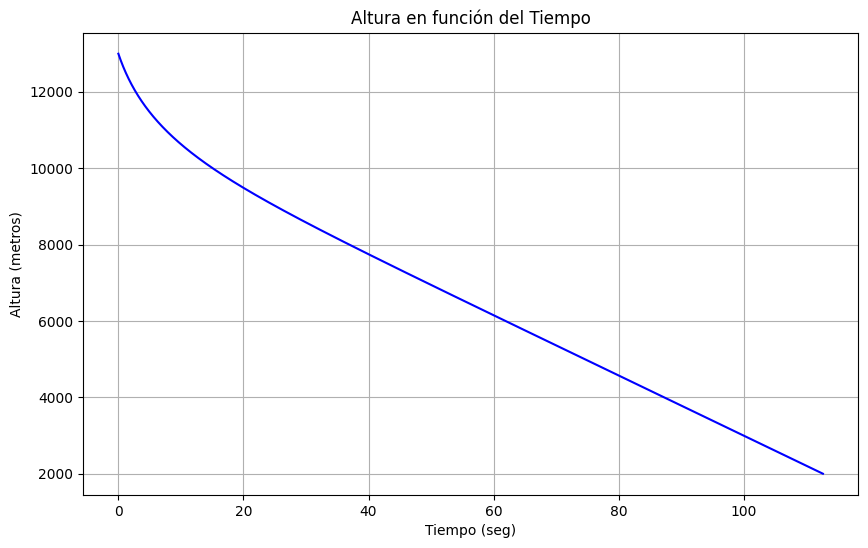

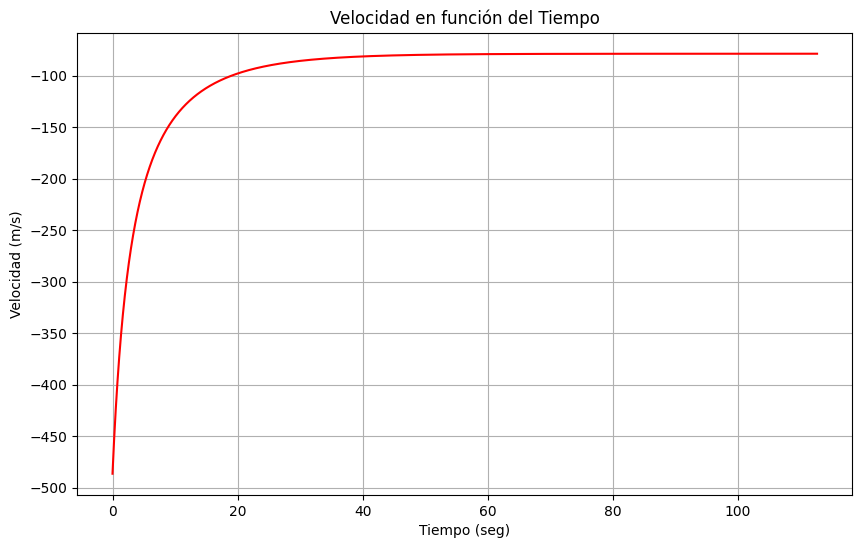

In [ ]:
#creaccion de graficos
#altura vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e2.index, df_e2['altura (m)'],'-b')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Altura (metros)')
plt.title('Altura en función del Tiempo')
plt.grid(True)
plt.show()
#valocidad vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e2.index, df_e2['velocidad(m/s)'],'-r')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad en función del Tiempo')
plt.grid(True)
plt.show()

In [ ]:
k1_ = 49
k2_ = 118

In [ ]:
altura_inicial_e3, v_inicial_e3 = res_i_e2[-1]
print(altura_inicial_e3,v_inicial_e3)
print(funcion3(382.4756968477866	,-110.21460791195803))

1999.5479720808028 -78.74277059040318
[-110.21460791195803, -3.72, 0]


In [ ]:
def RK2_e3(altura_inicial, velocidad_inicial, altura_final, h):
    # Inicio t (primera iteracion en t=0)
    i = 0
    # Vector resultado de iteracion
    res_i = [[altura_inicial, velocidad_inicial, 0]]
    ti = [0]
    k1v = ["--"]
    k2v = ["--"]
    er = ["--"]

    # Iteracion
    while abs(res_i[i][1]) > 0.03:
        k1 = funcion3(res_i[i][0], res_i[i][1])
        k1 = [h * k1[0],h * k1[1],k1[2]]
        k1v.append(k1)
        k2 = funcion3(res_i[i][0] + k1[0] * h, res_i[i][1] + k1[1] * h)
        k2 = [h * k2[0],h * k2[1]]
        k2v.append(k2)
        res_i.append([
            res_i[i][0] + (k1v[i+1][0] * 0.5 + k2v[i+1][0] * 0.5),
            res_i[i][1] + (k1v[i+1][1] * 0.5 + k2v[i+1][1] *0.5 ),
            k1[2]
        ])  # agregar expresion final
        er.append([
            abs(res_i[i+1][0] - res_i[i][0]) * 100 / abs(res_i[i][0]),
            abs(res_i[i+1][1] - res_i[i][1]) * 100 / abs(res_i[i][1])
        ])  # error absoluto
        ti.append(ti[i] + h)
        i += 1

    return (ti, res_i, k1v, k2v, er)

In [ ]:
ti_e3, res_i_e3, k1v_e3, k2v_e3, er_e3 = RK2_e3(altura_inicial_e3,v_inicial_e3,20,0.01)

In [ ]:
def trapecios_compuesto(valores_f):
  h = 0.01
  T = h * ((valores_f[0] + valores_f[-1]) / 2 + sum(valores_f[1 : len(valores_f) - 1]))
  return T
print(trapecios_compuesto([res[2] for res in res_i_e3]))

201.37127638236115


In [ ]:
df_e3 = pd.DataFrame({
    'altura (m)': [res[0] for res in res_i_e3],
    'velocidad(m/s)': [res[1] for res in res_i_e3],
    'caudal_masico_combustible': [res[2] for res in res_i_e3],
    'q1y': [k1[0] for k1 in k1v_e3],
    'q2y': [k2[0] for k2 in k2v_e3],
    'q1v': [k1[1] for k1 in k1v_e3],
    'q2v': [k2[1] for k2 in k2v_e3],
    'error_altura (%)': [e[0] for e in er_e3],
    'error_velocidad (%)': [e[1] for e in er_e3]
}, index=ti_e3)
df_e3.index.name = 'Tiempo(s)'

In [ ]:
df_e3

,altura (m),velocidad(m/s),caudal_masico_combustible,q1y,q2y,q1v,q2v,error_altura (%),error_velocidad (%)
Tiempo(s),,,,,,,,,
0.00,1999.547972,-78.742771,0.000000,-,-,-,-,-,-
0.01,1998.760543,-78.779971,0.000000,-0.787428,-0.787431,-0.0372,-0.0372,0.03938,0.047242
0.02,1997.972741,-78.817171,0.000000,-0.7878,-0.787803,-0.0372,-0.0372,0.039415,0.04722
0.03,1997.184567,-78.854371,0.000000,-0.788172,-0.788175,-0.0372,-0.0372,0.039449,0.047198
0.04,1996.396022,-78.891571,0.000000,-0.788544,-0.788547,-0.0372,-0.0372,0.039483,0.047176
...,...,...,...,...,...,...,...,...,...
35.53,20.072934,-0.030393,3.732604,-0.000305,-0.000305,0.000127,0.000127,0.00152,0.416704
35.54,20.072630,-0.030266,3.732552,-0.000304,-0.000304,0.000127,0.000127,0.001514,0.416704
35.55,20.072327,-0.030140,3.732499,-0.000303,-0.000303,0.000126,0.000126,0.001508,0.416704


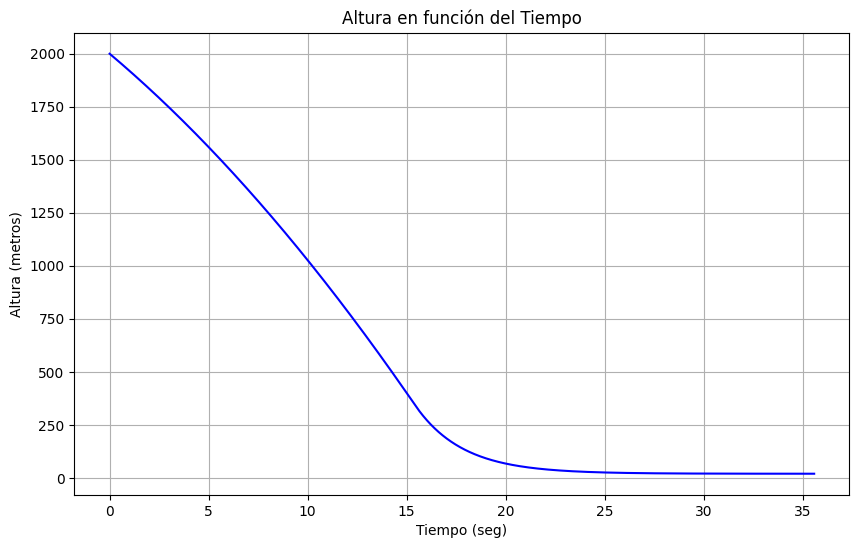

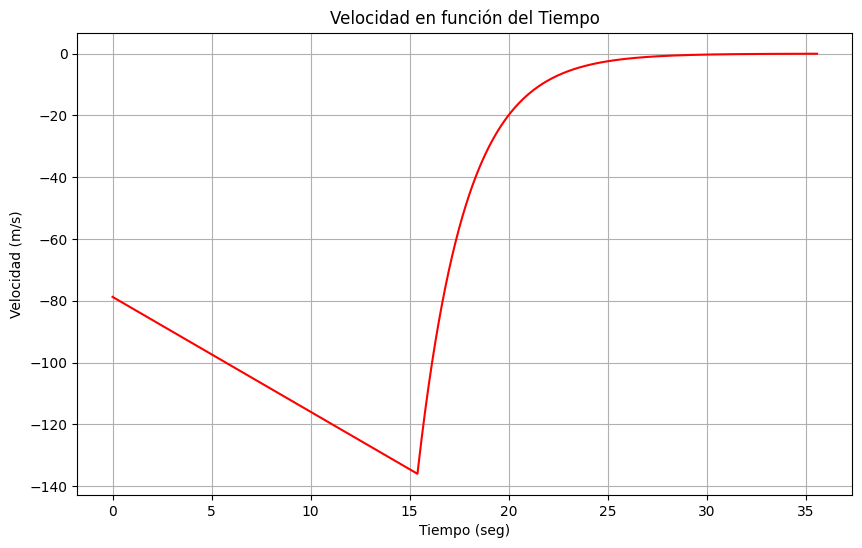

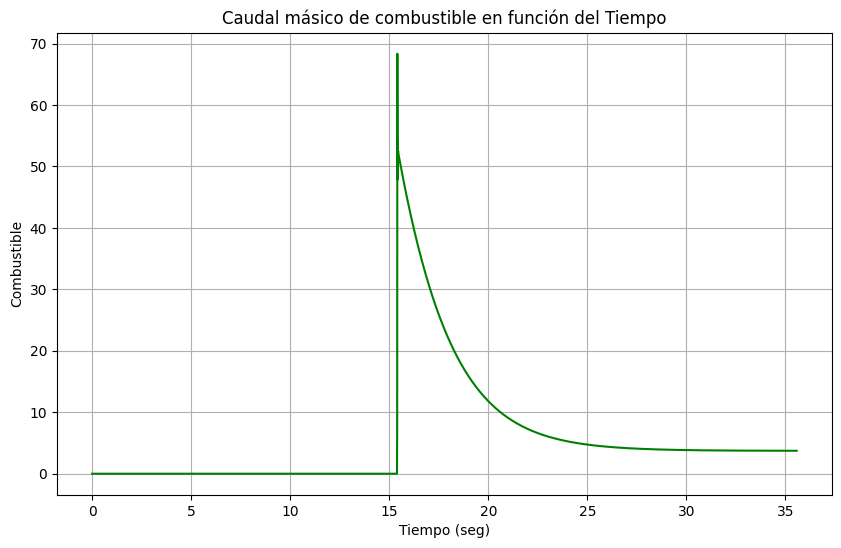

In [ ]:
#creaccion de graficos
#altura vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e3.index, df_e3['altura (m)'],'-b')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Altura (metros)')
plt.title('Altura en función del Tiempo')
plt.grid(True)
plt.show()
#valocidad vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e3.index, df_e3['velocidad(m/s)'],'-r')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad en función del Tiempo')
plt.grid(True)
plt.show()
#combustible vs t
plt.figure(figsize=(10, 6))
plt.plot(df_e3.index, df_e3['caudal_masico_combustible'],'-g')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Combustible')
plt.title('Caudal másico de combustible en función del Tiempo')
plt.grid(True)
plt.show()

In [ ]:
def tiempo_total():
  ti = []
  t = 0
  for i in range(0, len(ti_e1 + ti_e2 + ti_e3)):
    ti.append(t)
    t += 0.01
  return ti

In [ ]:
ti = tiempo_total()
y = [res_i[0] for res_i in res_i_e1] + [res_i[0] for res_i in res_i_e2] + [res_i[0] for res_i in res_i_e3]
v = [res_i[1] for res_i in res_i_e1] + [res_i[1] for res_i in res_i_e2] + [res_i[1] for res_i in res_i_e3]
q1y = [q1[0] for q1 in k1v_e1] + [q1[0] for q1 in k1v_e2] + [q1[0] for q1 in k1v_e3]
q1v = [q1[1] for q1 in k1v_e1] + [q1[1] for q1 in k1v_e2] + [q1[1] for q1 in k1v_e3]
q2y = [q2[0] for q2 in k2v_e1] + [q2[0] for q2 in k2v_e2] + [q2[0] for q2 in k2v_e3]
q2v = [q2[1] for q2 in k2v_e1] + [q2[1] for q2 in k2v_e2] + [q2[1] for q2 in k2v_e3]
er_y = [er[0] for er in er_e1] + [er[0] for er in er_e2] + [er[0] for er in er_e3]
er_v = [er[1] for er in er_e1] + [er[1] for er in er_e2] + [er[1] for er in er_e3]

In [ ]:
df = pd.DataFrame({
    'altura (m)': [y_i for y_i in y],
    'velocidad(m/s)': [v_i for v_i in v],
    'q1y': [q1y_i for q1y_i in q1y],
    'q2y': [q2y_i for q2y_i in q2y],
    'q1v': [q1v_i for q1v_i in q1v],
    'q2v': [q2v_i for q2v_i in q2v],
    'error_altura (%)': [er_y_i for er_y_i in er_y],
    'error_velocidad (%)': [er_v_i for er_v_i in er_v]
}, index=ti)
df.index.name = 'Tiempo(s)'

In [ ]:
df

,altura (m),velocidad(m/s),q1y,q2y,q1v,q2v,error_altura (%),error_velocidad (%)
Tiempo(s),,,,,,,,
0.00,130000.000000,-5555.560000,-,-,-,-,-,-
0.01,129944.444692,-5549.725438,-55.5556,-55.555017,5.834617,5.834507,0.042735,0.105022
0.02,129888.947729,-5543.901900,-55.497254,-55.496672,5.823593,5.823483,0.042708,0.104934
0.03,129833.509000,-5538.089358,-55.439019,-55.438438,5.812598,5.812488,0.042682,0.104846
0.04,129778.128397,-5532.287780,-55.380894,-55.380313,5.801632,5.801523,0.042655,0.104758
...,...,...,...,...,...,...,...,...
241.00,20.072934,-0.030393,-0.000305,-0.000305,0.000127,0.000127,0.00152,0.416704
241.01,20.072630,-0.030266,-0.000304,-0.000304,0.000127,0.000127,0.001514,0.416704
241.02,20.072327,-0.030140,-0.000303,-0.000303,0.000126,0.000126,0.001508,0.416704


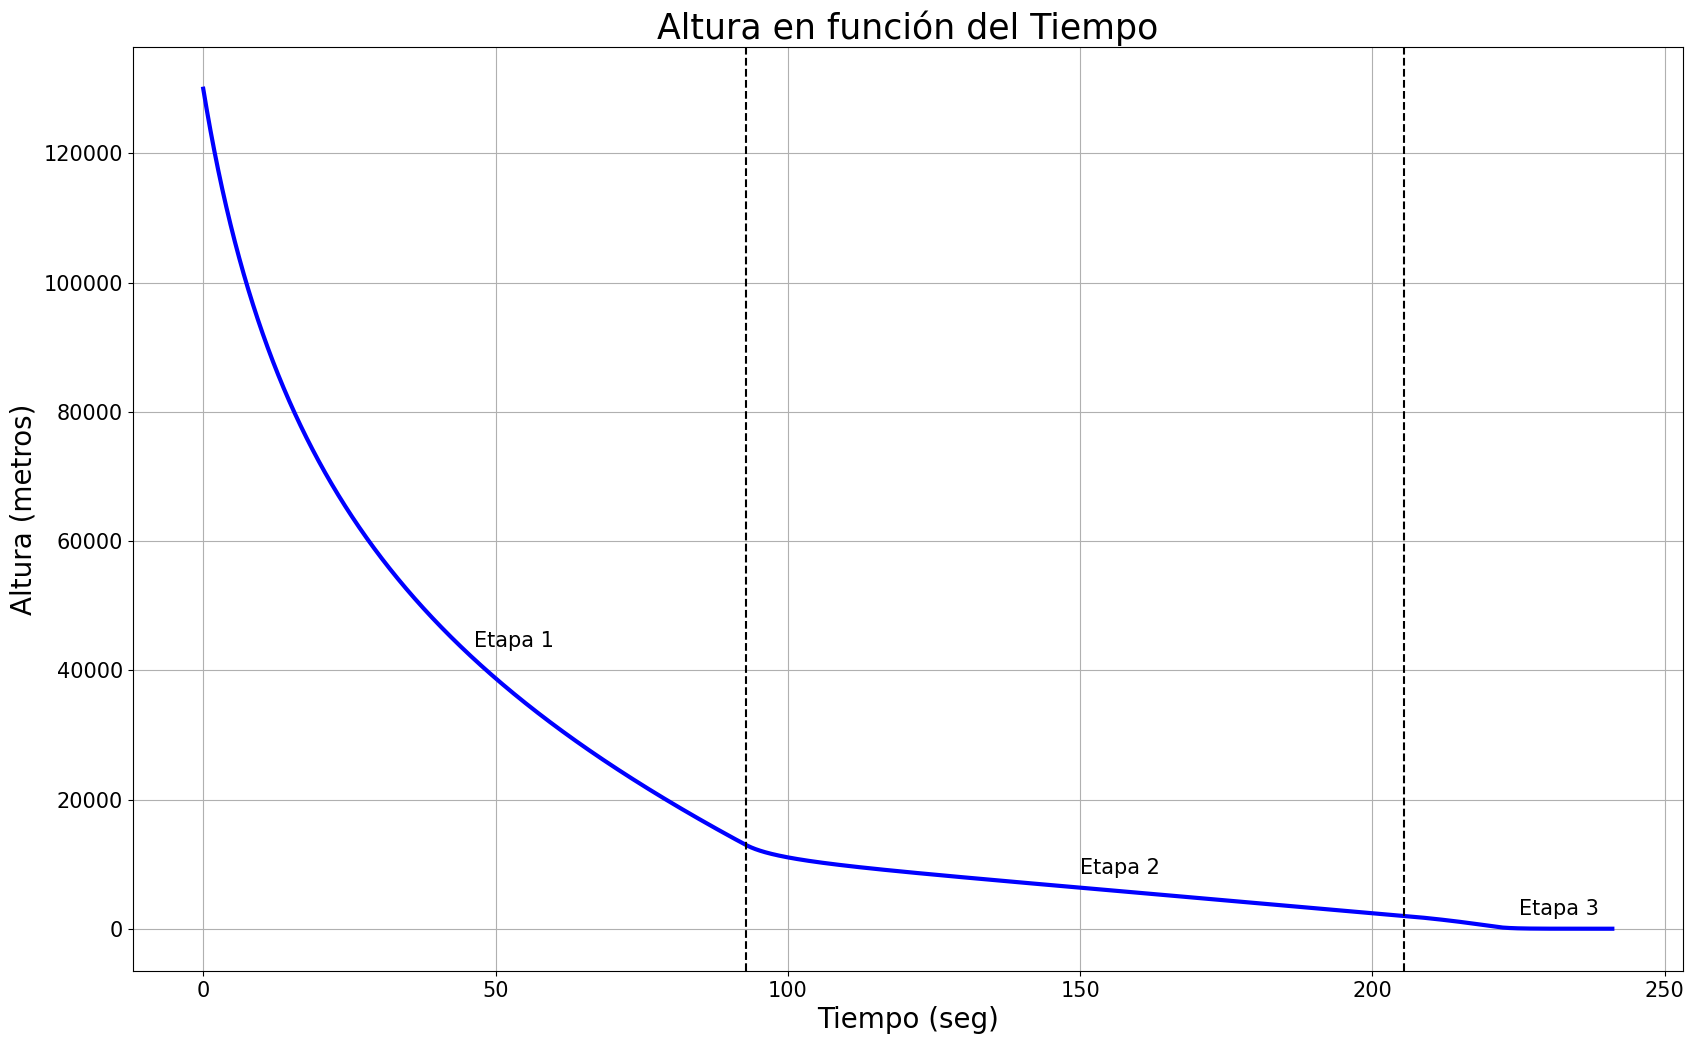

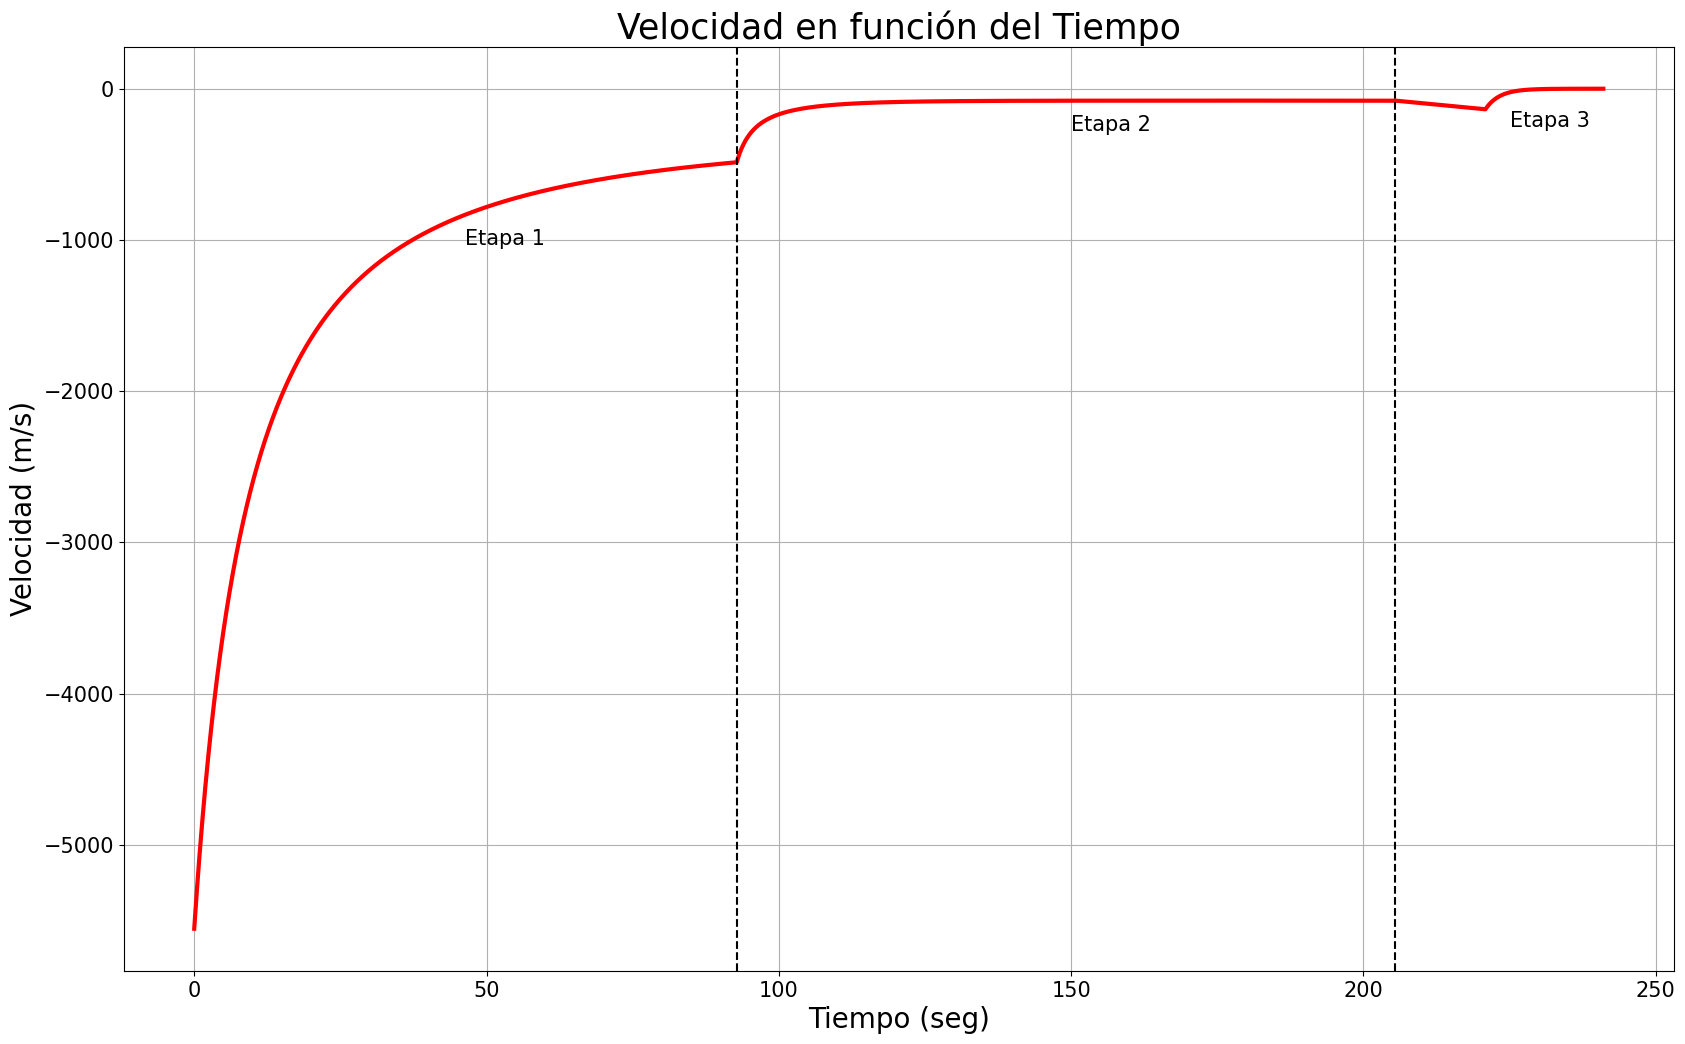

In [ ]:
#grafico de evolucion de todas las etapas.
#creaccion de graficos
mitad_etapa1 = len(df_e1['altura (m)']) // 2
mitad_etapa2 = len(df_e2['altura (m)']) // 2
mitad_etapa3 = len(df_e3['altura (m)']) // 2


#altura vs t
plt.figure(num=None, figsize=(20, 12))
plt.plot(df.index, df['altura (m)'],'-b',linewidth=3)
plt.axvline(x=92.80, color='black', linestyle='--', label='Inicio Etapa 2')
plt.axvline(x=(92.80 + 112.65), color='black', linestyle='--', label='Inicio Etapa 2')
plt.annotate('Etapa 1', xy=(df_e1.index[mitad_etapa1], df_e1['altura (m)'].iloc[mitad_etapa1]),
             xytext=(df_e1.index[mitad_etapa1], df_e1['altura (m)'].iloc[mitad_etapa1]+2000),
             fontsize=15, color='black')

plt.annotate('Etapa 2', xy=(150, df_e2['altura (m)'].iloc[mitad_etapa2]),
             xytext=(150, df_e2['altura (m)'].iloc[mitad_etapa2]+2000),
             fontsize=15, color='black')

plt.annotate('Etapa 3', xy=(225, df_e3['altura (m)'].iloc[mitad_etapa3]),
             xytext=(225, df_e3['altura (m)'].iloc[mitad_etapa3] +2000),
             fontsize=15, color='black')
plt.xlabel('Tiempo (seg)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Altura (metros)',fontsize=20)
plt.title('Altura en función del Tiempo',fontsize=25)
plt.grid(True)
plt.show()
#valocidad vs t
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['velocidad(m/s)'],'-r', linewidth=3)
plt.axvline(x=92.80, color='black', linestyle='--', label='Inicio Etapa 2')
plt.axvline(x=(92.80 + 112.65), color='black', linestyle='--', label='Inicio Etapa 2')
plt.annotate('Etapa 1', xy=(df_e1.index[mitad_etapa1], df_e1['velocidad(m/s)'].iloc[mitad_etapa1]),
             xytext=(df_e1.index[mitad_etapa1], df_e1['velocidad(m/s)'].iloc[mitad_etapa1]-200),
             fontsize=15, color='black')

plt.annotate('Etapa 2', xy=(150, df_e2['velocidad(m/s)'].iloc[mitad_etapa2]),
             xytext=(150, df_e2['velocidad(m/s)'].iloc[mitad_etapa2]-200),
             fontsize=15, color='black')

plt.annotate('Etapa 3', xy=(225, df_e3['velocidad(m/s)'].iloc[mitad_etapa3]),
             xytext=(225, df_e3['velocidad(m/s)'].iloc[mitad_etapa3] -200),
             fontsize=15, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Tiempo (seg)',fontsize=20)
plt.ylabel('Velocidad (m/s)',fontsize=20)
plt.title('Velocidad en función del Tiempo',fontsize=25)
plt.grid(True)
plt.show()